__Note__
*__The outliers are not treated before making of this model.__

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling


In [2]:

from sklearn.linear_model import LinearRegression


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

# Importing the Data set

In [5]:
df = pd.read_csv("50_Startups.csv")

# EDA

In [6]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.shape

(50, 5)

__50 no. of rows and 5 no. of columns.__

In [8]:
df.State.value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

__There are three different state in our data set where startups are__

In [9]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

__There is No missing values in our Dataset.__

In [11]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

__The Below Matrix shows the co-relation between different continous features.__

In [12]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

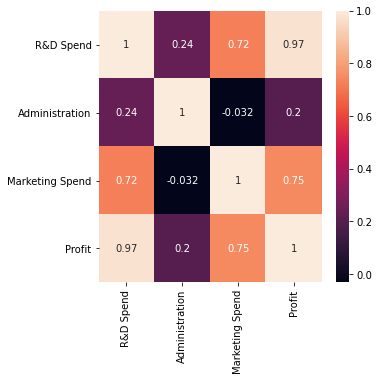

In [13]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)

<Figure size 720x720 with 0 Axes>

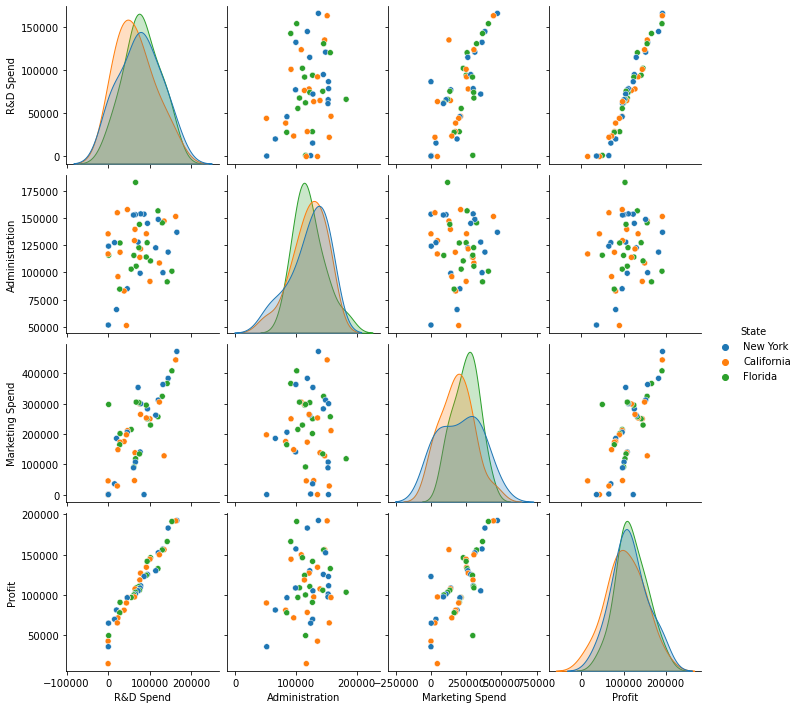

In [14]:
plt.figure(figsize=(10,10))
sns.pairplot(df,hue='State')

__From the above Data it is clear that Profit and R&D spend has very high correlation and we can even use R&D Spend to measure the profit alone.__

In [15]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [16]:
# renaming the columns because it contains the space in between which may cause error in our code.
df.rename(columns = {'R&D Spend':'RDS','Administration':'ADM' , 'Marketing Spend':'MS'}, inplace = True) 

__Converting the state categorical data into numerical data.__

In [17]:
le=LabelEncoder()
df['State']=le.fit_transform(df['State'])

In [18]:
df = pd.get_dummies(df, columns=['State'],drop_first=True)

In [19]:
df.head(3)

,RDS,ADM,MS,Profit,State_1,State_2
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0


# Linear regression model

In [20]:
lr=LinearRegression()

In [21]:
X=df.drop(columns='Profit')
X.head()

,RDS,ADM,MS,State_1,State_2
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [22]:
y=df['Profit']

In [23]:
lr.fit(X,y)

LinearRegression()

In [24]:
linear_pred=lr.predict(X)

In [25]:
from math import sqrt
MSE= metrics.mean_squared_error(y,linear_pred)

rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 8854.761029414496


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

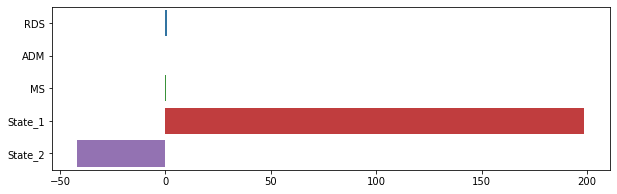

In [26]:
# Barplot for coefficients
features= X.columns
plt.figure(figsize=(10,3))
sns.barplot(lr.coef_,features)

# Using statsmodels

In [27]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RDS+ADM+MS+State_1+State_2',data=df).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 13 May 2021   Prob (F-statistic):           1.34e-27
Time:                        22:35:04   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
RDS            0.8060      0.046     17.369      0.000       0.712       0.900
ADM           -0.0270      0.052     -0.517      0.608      -0.132       0.078
MS             0.0270      0.017      1.574      0.123      -0.008       0.062
State_1      198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State_2      -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
model.params

Intercept    50125.343832
RDS              0.806023
ADM             -0.027004
MS               0.026980
State_1        198.788793
State_2        -41.887019
dtype: float64

In [30]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     7.280560
RDS          17.368580
ADM          -0.517012
MS            1.573889
State_1       0.058970
State_2      -0.012864
dtype: float64 
 Intercept    4.444178e-09
RDS          2.578772e-21
ADM          6.077373e-01
MS           1.226769e-01
State_1      9.532429e-01
State_2      9.897941e-01
dtype: float64


In [31]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

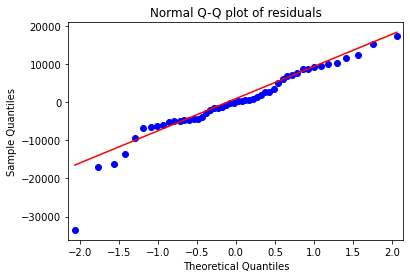

In [32]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [33]:
df.drop(columns='Profit').head()

,RDS,ADM,MS,State_1,State_2
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [34]:
ypred=model.predict(df.drop(columns='Profit'))

In [35]:
from math import sqrt
MSE= metrics.mean_squared_error(df['Profit'],ypred)

rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 8854.761029414494


# Normalization


In [36]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [37]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,:3])
df_norm.head()

,RDS,ADM,MS
0,1.000000,0.651744,1.000000
1,0.983359,0.761972,0.940893
2,0.927985,0.379579,0.864664
3,0.873136,0.512998,0.812235
4,0.859438,0.305328,0.776136


In [38]:
df_norm['Profit']=df['Profit']

In [39]:
df_norm['State_1']=df['State_1']

In [40]:
df_norm['State_2']=df['State_2']

In [41]:
df_norm.head()

,RDS,ADM,MS,Profit,State_1,State_2
0,1.000000,0.651744,1.000000,192261.83,0,1
1,0.983359,0.761972,0.940893,191792.06,0,0
2,0.927985,0.379579,0.864664,191050.39,1,0
3,0.873136,0.512998,0.812235,182901.99,0,1
4,0.859438,0.305328,0.776136,166187.94,1,0


In [42]:
#Build model
import statsmodels.formula.api as smf 
model1 = smf.ols('Profit~RDS+ADM+MS+State_1+State_2',data=df_norm).fit()

In [43]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 13 May 2021   Prob (F-statistic):           1.34e-27
Time:                        22:35:15   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.874e+04   4665.393     10.447      0.000    3.93e+04    5.81e+04
RDS         1.333e+05   7673.355     17.369      0.000    1.18e+05    1.49e+05
ADM        -3547.3528   6861.263     -0.517      0.608   -1.74e+04    1.03e+04
MS          1.273e+04   8087.397      1.574      0.123   -3570.409     2.9e+04
State_1      198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State_2      -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model1.params

Intercept     48740.477530
RDS          133275.277035
ADM           -3547.352770
MS            12728.669456
State_1         198.788793
State_2         -41.887019
dtype: float64

In [45]:
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues)

Intercept    10.447240
RDS          17.368580
ADM          -0.517012
MS            1.573889
State_1       0.058970
State_2      -0.012864
dtype: float64 
 Intercept    1.703231e-13
RDS          2.578772e-21
ADM          6.077373e-01
MS           1.226769e-01
State_1      9.532429e-01
State_2      9.897941e-01
dtype: float64


In [46]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

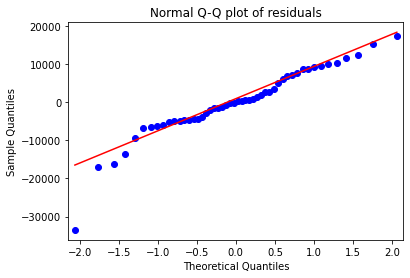

In [47]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [48]:
norm_pred=model1.predict(df_norm.drop(columns='Profit'))

In [49]:
from math import sqrt
MSE= metrics.mean_squared_error(df_norm['Profit'],norm_pred)

rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 8854.761029414494


# Standardization

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
ss=StandardScaler()

In [52]:
dfs=ss.fit_transform(df.iloc[:,0:3])

In [53]:
df_scaled = pd.DataFrame(ss.fit_transform(dfs),columns = df.columns[0:3])
df_scaled.head()

,RDS,ADM,MS
0,2.016411,0.560753,2.153943
1,1.955860,1.082807,1.923600
2,1.754364,-0.728257,1.626528
3,1.554784,-0.096365,1.422210
4,1.504937,-1.079919,1.281528


In [54]:
df_scaled['State_1']=df['State_1']
df_scaled['State_2']=df['State_2']
df_scaled['Profit']=df['Profit']



In [55]:
df_scaled.head()

,RDS,ADM,MS,State_1,State_2,Profit
0,2.016411,0.560753,2.153943,0,1,192261.83
1,1.955860,1.082807,1.923600,0,0,191792.06
2,1.754364,-0.728257,1.626528,1,0,191050.39
3,1.554784,-0.096365,1.422210,0,1,182901.99
4,1.504937,-1.079919,1.281528,1,0,166187.94


In [56]:
#Build model
import statsmodels.formula.api as smf 
model3 = smf.ols('Profit~RDS+ADM+MS+State_1+State_2',data=df_scaled).fit()

In [57]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 13 May 2021   Prob (F-statistic):           1.34e-27
Time:                        22:35:17   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.12e+05   2312.602     48.414      0.000    1.07e+05    1.17e+05
RDS         3.663e+04   2108.775     17.369      0.000    3.24e+04    4.09e+04
ADM         -748.9975   1448.705     -0.517      0.608   -3668.671    2170.676
MS          3266.2152   2075.251      1.574      0.123    -916.178    7448.608
State_1      198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State_2      -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                         4.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

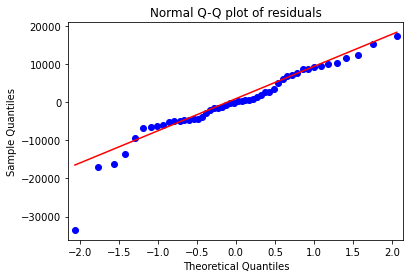

In [58]:
import statsmodels.api as sm
qqplot=sm.qqplot(model3.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [59]:
norm_pred=model3.predict(df_scaled.drop(columns='Profit'))

In [60]:
from math import sqrt
MSE= metrics.mean_squared_error(df_scaled['Profit'],norm_pred)

rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 8854.761029414496


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [64]:
df1=df.drop(labels=['State_2','State_1','ADM'],axis=1)

In [66]:
df1.head()

,RDS,MS,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


In [67]:
X=df1.iloc[:,:2]
y=df.Profit

In [68]:
ss=StandardScaler()
X_s=ss.fit_transform(X)
X_s = pd.DataFrame(ss.fit_transform(X),columns = X.columns[:])
X_s.head()

,RDS,MS
0,2.016411,2.153943
1,1.955860,1.923600
2,1.754364,1.626528
3,1.554784,1.422210
4,1.504937,1.281528


In [69]:
# 20% data as validation set
x_strain,x_svalid,y_strain,y_svalid = train_test_split(X_s,y,test_size=0.2,random_state=22)

In [70]:
lr2=LinearRegression()
lr2.fit(x_strain,y_strain)

LinearRegression()

In [71]:
y1_spred=lr2.predict(x_svalid)

In [72]:
from math import sqrt
MSE= metrics.mean_squared_error(y_svalid,y1_spred)

rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 6407.194220989373


# variance inflation factor (VIF)

__With Profit included__

In [61]:
rsq_hp = smf.ols('Profit~RDS+ADM+MS+State_1+State_2',data=df_scaled).fit().rsquared  
vif_profit = 1/(1-rsq_hp) # 16.33

rsq_wt = smf.ols('RDS~Profit+ADM+MS+State_1+State_2',data=df_scaled).fit().rsquared  
vif_RDS = 1/(1-rsq_wt) # 564.98

rsq_vol = smf.ols('ADM~RDS+Profit+MS+State_1+State_2',data=df_scaled).fit().rsquared  
vif_ADM = 1/(1-rsq_vol) #  564.84

rsq_sp = smf.ols('MS~RDS+ADM+Profit+State_1+State_2',data=df_scaled).fit().rsquared  
vif_MS = 1/(1-rsq_sp) #  1MS6.35

rsq_sp = smf.ols('State_1~RDS+ADM+MS+Profit+State_2',data=df_scaled).fit().rsquared  
vif_State_1 = 1/(1-rsq_sp) #  16.35

rsq_sp = smf.ols('State_2~RDS+ADM+MS+State_1+Profit',data=df_scaled).fit().rsquared  
vif_State_2 = 1/(1-rsq_sp) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['Profit','RDS','ADM','MS','State_1','State_1'],'VIF':[vif_profit,vif_RDS,vif_ADM
                                                                         ,vif_MS,vif_State_1,vif_State_2]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Profit,20.305593
1,RDS,19.604937
2,ADM,1.184921
3,MS,2.552858
4,State_1,1.387751
5,State_1,1.335066


__With profit Excluded__

In [62]:
#rsq_hp = smf.ols('Profit~RDS+ADM+MS+State_1+State_2',data=df_scaled).fit().rsquared  
#vif_profit = 1/(1-rsq_hp) # 16.33

rsq_wt = smf.ols('RDS~ADM+MS+State_1+State_2',data=df_scaled).fit().rsquared  
vif_RDS = 1/(1-rsq_wt) # 564.98

rsq_vol = smf.ols('ADM~RDS+MS+State_1+State_2',data=df_scaled).fit().rsquared  
vif_ADM = 1/(1-rsq_vol) #  564.84

rsq_sp = smf.ols('MS~RDS+ADM+State_1+State_2',data=df_scaled).fit().rsquared  
vif_MS = 1/(1-rsq_sp) #  1MS6.35

rsq_sp = smf.ols('State_1~RDS+ADM+MS+State_2',data=df_scaled).fit().rsquared  
vif_State_1 = 1/(1-rsq_sp) #  16.35

rsq_sp = smf.ols('State_2~RDS+ADM+MS+State_1',data=df_scaled).fit().rsquared  
vif_State_2 = 1/(1-rsq_sp) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['RDS','ADM','MS','State_1','State_1'],'VIF':[vif_RDS,vif_ADM
                                                                         ,vif_MS,vif_State_1,vif_State_2]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDS,2.495511
1,ADM,1.177766
2,MS,2.416797
3,State_1,1.387641
4,State_1,1.335061
